# NY Bike Sharing Service

## Content
A bike-sharing service is a shared transport service in which bicycles are made available for shared use to individuals on a short-term basis for a certain price or free. Many bike share systems allow people to borrow a bike from a station and return it at another station belonging to the same system.

This dataset contains bike trips of a bike-sharing company in New York for one month. The dataset consists of ≈ 1.6M rows and 11 columns. The attributes are:
1. start_time (date): the time when a trip starts (in NYC local time).
2. stop_time (date): the time when a trip is over (in NYC local time).
3. start_station_id (categorical): a unique code to identify a station where a trip begins.
4. start_station_name (categorical): the name of a station where a trip begins.
5. end_station_id (categorical): a unique code to identify a station where a trip is over.
6. end_station_name (categorical): the name of a station where a trip is over.
7. user_type (categorical): the type of bike user.
8. bike_id (categorical): a unique code to identify a bike user.
9. gender (categorical): gender of the user.
10. age (numeric): age of the user.
11. trip_duration (numeric): the duration of a trip (in minutes).

## Questions
1. Who is the largest group of users in May 2018?
2. How was the daily trend of the number of trips and number of users in May 2018?
3. What is the station that the users visit most in May 2018?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Data Wrangling

In [2]:
# Options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 15)
plt.style.use('ggplot')
sns.set_style("whitegrid")

df = pd.read_csv(r'New York Citibike Trips.csv')
df.sample(5)

,start_time,stop_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,bike_id,gender,age,trip_duration
58170,2018-05-30 20:22:17,2018-05-30 20:27:19,3119,Vernon Blvd & 50 Ave,3118,McGuinness Blvd & Eagle St,Subscriber,16720,male,36,5.03
1204611,2018-05-07 18:28:06,2018-05-07 18:49:51,3461,Murray St & Greenwich St,476,E 31 St & 3 Ave,Subscriber,25333,male,25,21.73
787088,2018-05-15 15:39:03,2018-05-15 15:48:24,266,Avenue D & E 8 St,265,Stanton St & Chrystie St,Subscriber,30775,female,27,9.33
831783,2018-05-14 18:52:58,2018-05-14 19:03:29,3664,North Moore St & Greenwich St,151,Cleveland Pl & Spring St,Subscriber,19135,male,28,10.50
1209263,2018-05-07 17:52:12,2018-05-07 18:07:29,402,Broadway & E 22 St,523,W 38 St & 8 Ave,Subscriber,18404,female,40,15.28


In [3]:
df.shape

(1595334, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595334 entries, 0 to 1595333
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   start_time          1595334 non-null  object 
 1   stop_time           1595334 non-null  object 
 2   start_station_id    1595334 non-null  int64  
 3   start_station_name  1595334 non-null  object 
 4   end_station_id      1595334 non-null  int64  
 5   end_station_name    1595334 non-null  object 
 6   user_type           1595334 non-null  object 
 7   bike_id             1595334 non-null  int64  
 8   gender              1595334 non-null  object 
 9   age                 1595334 non-null  int64  
 10  trip_duration       1595334 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 133.9+ MB


In [5]:
df.nunique()

start_time            1010183
stop_time             1013641
start_station_id          766
start_station_name        766
end_station_id            774
end_station_name          774
user_type                   2
bike_id                 12332
gender                      2
age                        50
trip_duration            9106
dtype: int64

Base on the nunique, ID and NAME for station are the same. We can safely say each unique ID corresponds to a unique NAME and vice versa. For the user type, there's only 2 type of bike users.

In [6]:
df.describe().round(2)

,start_station_id,end_station_id,bike_id,age,trip_duration
count,1595334.00,1595334.00,1595334.00,1595334.00,1595334.00
mean,1548.19,1537.10,26201.61,37.86,16.43
std,1427.93,1426.69,5784.64,11.03,284.86
min,72.00,72.00,14529.00,16.00,1.02
25%,380.00,379.00,20626.00,29.00,6.12
50%,502.00,501.00,27865.00,35.00,10.27
75%,3232.00,3232.00,31026.00,46.00,17.67
max,3686.00,3686.00,33690.00,65.00,111781.68


## Converting Dtypes
Transforming Dtypes to have better memory usage and to improve the perfomance when we perform data manipulations. We will downcast some int and float. Also we will change some object to categorical and datetime.

**Float:**
- float16: range of approximately -65500.0 to 65500.0
- float32: range of approximately -3.4 x 10^38 to 3.4 x 10^38
- float64: range of approximately -1.8 x 10^308 to 1.8 x 10^308

**Int:**
- int8: range of -128 to 127
- int32: range of approximately -2.1 billion to 2.1 billion
- int64: range of approximately -9.2 x 10^18 to 9.2 x 10^18

**Convert columns to this type:**
- start_time (date)
- stop_time (date)
- start_station_id (categorical)
- start_station_name (categorical)
- end_station_id (categorical)
- end_station_name (categorical)
- user_type (categorical)
- bike_id (categorical)
- gender (categorical)
- age (numeric)
- trip_duration (numeric)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595334 entries, 0 to 1595333
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   start_time          1595334 non-null  object 
 1   stop_time           1595334 non-null  object 
 2   start_station_id    1595334 non-null  int64  
 3   start_station_name  1595334 non-null  object 
 4   end_station_id      1595334 non-null  int64  
 5   end_station_name    1595334 non-null  object 
 6   user_type           1595334 non-null  object 
 7   bike_id             1595334 non-null  int64  
 8   gender              1595334 non-null  object 
 9   age                 1595334 non-null  int64  
 10  trip_duration       1595334 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 133.9+ MB


In [8]:
df.memory_usage(deep=True)

Index                       128
start_time            121245384
stop_time             121245384
start_station_id       12762672
start_station_name    122092910
end_station_id         12762672
end_station_name      122063322
user_type             106738720
bike_id                12762672
gender                 98146528
age                    12762672
trip_duration          12762672
dtype: int64

In [9]:
df.describe().round(2)

,start_station_id,end_station_id,bike_id,age,trip_duration
count,1595334.00,1595334.00,1595334.00,1595334.00,1595334.00
mean,1548.19,1537.10,26201.61,37.86,16.43
std,1427.93,1426.69,5784.64,11.03,284.86
min,72.00,72.00,14529.00,16.00,1.02
25%,380.00,379.00,20626.00,29.00,6.12
50%,502.00,501.00,27865.00,35.00,10.27
75%,3232.00,3232.00,31026.00,46.00,17.67
max,3686.00,3686.00,33690.00,65.00,111781.68


In [10]:
# Date to pd.datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['stop_time'] = pd.to_datetime(df['stop_time'])


# Float64 to 32, int64 to int32, and other object types to categorical
dtypes = {
    'start_station_id': 'category', 
    'start_station_name': 'category',
    'end_station_id': 'category',
    'end_station_name': 'category',
    'user_type': 'category',
    'bike_id': 'category',
    'gender': 'category',
    'age': 'int8',
    'trip_duration': 'float32'
}
df = df.astype(dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595334 entries, 0 to 1595333
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   start_time          1595334 non-null  datetime64[ns]
 1   stop_time           1595334 non-null  datetime64[ns]
 2   start_station_id    1595334 non-null  category      
 3   start_station_name  1595334 non-null  category      
 4   end_station_id      1595334 non-null  category      
 5   end_station_name    1595334 non-null  category      
 6   user_type           1595334 non-null  category      
 7   bike_id             1595334 non-null  category      
 8   gender              1595334 non-null  category      
 9   age                 1595334 non-null  int8          
 10  trip_duration       1595334 non-null  float32       
dtypes: category(7), datetime64[ns](2), float32(1), int8(1)
memory usage: 50.6 MB


In [11]:
df.memory_usage(deep=True)

Index                      128
start_time            12762672
stop_time             12762672
start_station_id       3213348
start_station_name     3266398
end_station_id         3213412
end_station_name       3266973
user_type              1595574
bike_id                3553556
gender                 1595566
age                    1595334
trip_duration          6381336
dtype: int64

Converting our data to appropriate data types, like `category`, `int`, `float`, or `datetime`, our memory usage decreased from **133.9+ MB to 50.6 MB**. This will improve the performance, readability, and consistency of our data.

`category` can speed up grouping and sorting, numerical types are good for calculations, and `datetime` makes it easy to manipulate date and time data.

## Cleaning the data

### Checking for null values

#### Null values observation

This dataset doesn't contain any null values.

In [12]:
df_copy = df.copy()
df_copy.isnull().sum()

start_time            0
stop_time             0
start_station_id      0
start_station_name    0
end_station_id        0
end_station_name      0
user_type             0
bike_id               0
gender                0
age                   0
trip_duration         0
dtype: int64

### Checking for duplicates

#### Duplicates observation

Duplicates in this dataset are not necessarily an issue, as multiple people can share the same values for each column. For example, many people can start or end their trip at the same station, rent the same bike, have the same age, or have the same trip duration. Therefore, we don't necessarily need to remove all duplicates.

In [13]:
df_copy.head()

,start_time,stop_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,bike_id,gender,age,trip_duration
0,2018-05-31 23:59:59,2018-06-01 00:12:57,312,Allen St & Stanton St,460,S 4 St & Wythe Ave,Subscriber,25805,male,32,12.97
1,2018-05-31 23:59:59,2018-06-01 00:12:26,401,Allen St & Rivington St,360,William St & Pine St,Subscriber,17258,male,24,12.45
2,2018-05-31 23:59:51,2018-06-01 00:08:09,483,E 12 St & 3 Ave,368,Carmine St & 6 Ave,Subscriber,19692,male,39,8.28
3,2018-05-31 23:59:48,2018-06-01 00:07:33,3107,Bedford Ave & Nassau Ave,3076,Scholes St & Manhattan Ave,Subscriber,28285,male,28,7.75
4,2018-05-31 23:59:45,2018-06-01 00:07:48,3341,Central Park West & W 102 St,3400,E 110 St & Madison Ave,Subscriber,21000,female,51,8.05


In [14]:
df_copy.duplicated(keep=False).sum()

0

In [15]:
duplicates_per_column = df_copy.apply(lambda x: f"{x.duplicated().sum():,}", axis=0)
duplicates_per_column

start_time              585,151
stop_time               581,693
start_station_id      1,594,568
start_station_name    1,594,568
end_station_id        1,594,560
end_station_name      1,594,560
user_type             1,595,332
bike_id               1,583,002
gender                1,595,332
age                   1,595,284
trip_duration         1,586,228
dtype: object

# Exploratory Data Analysis

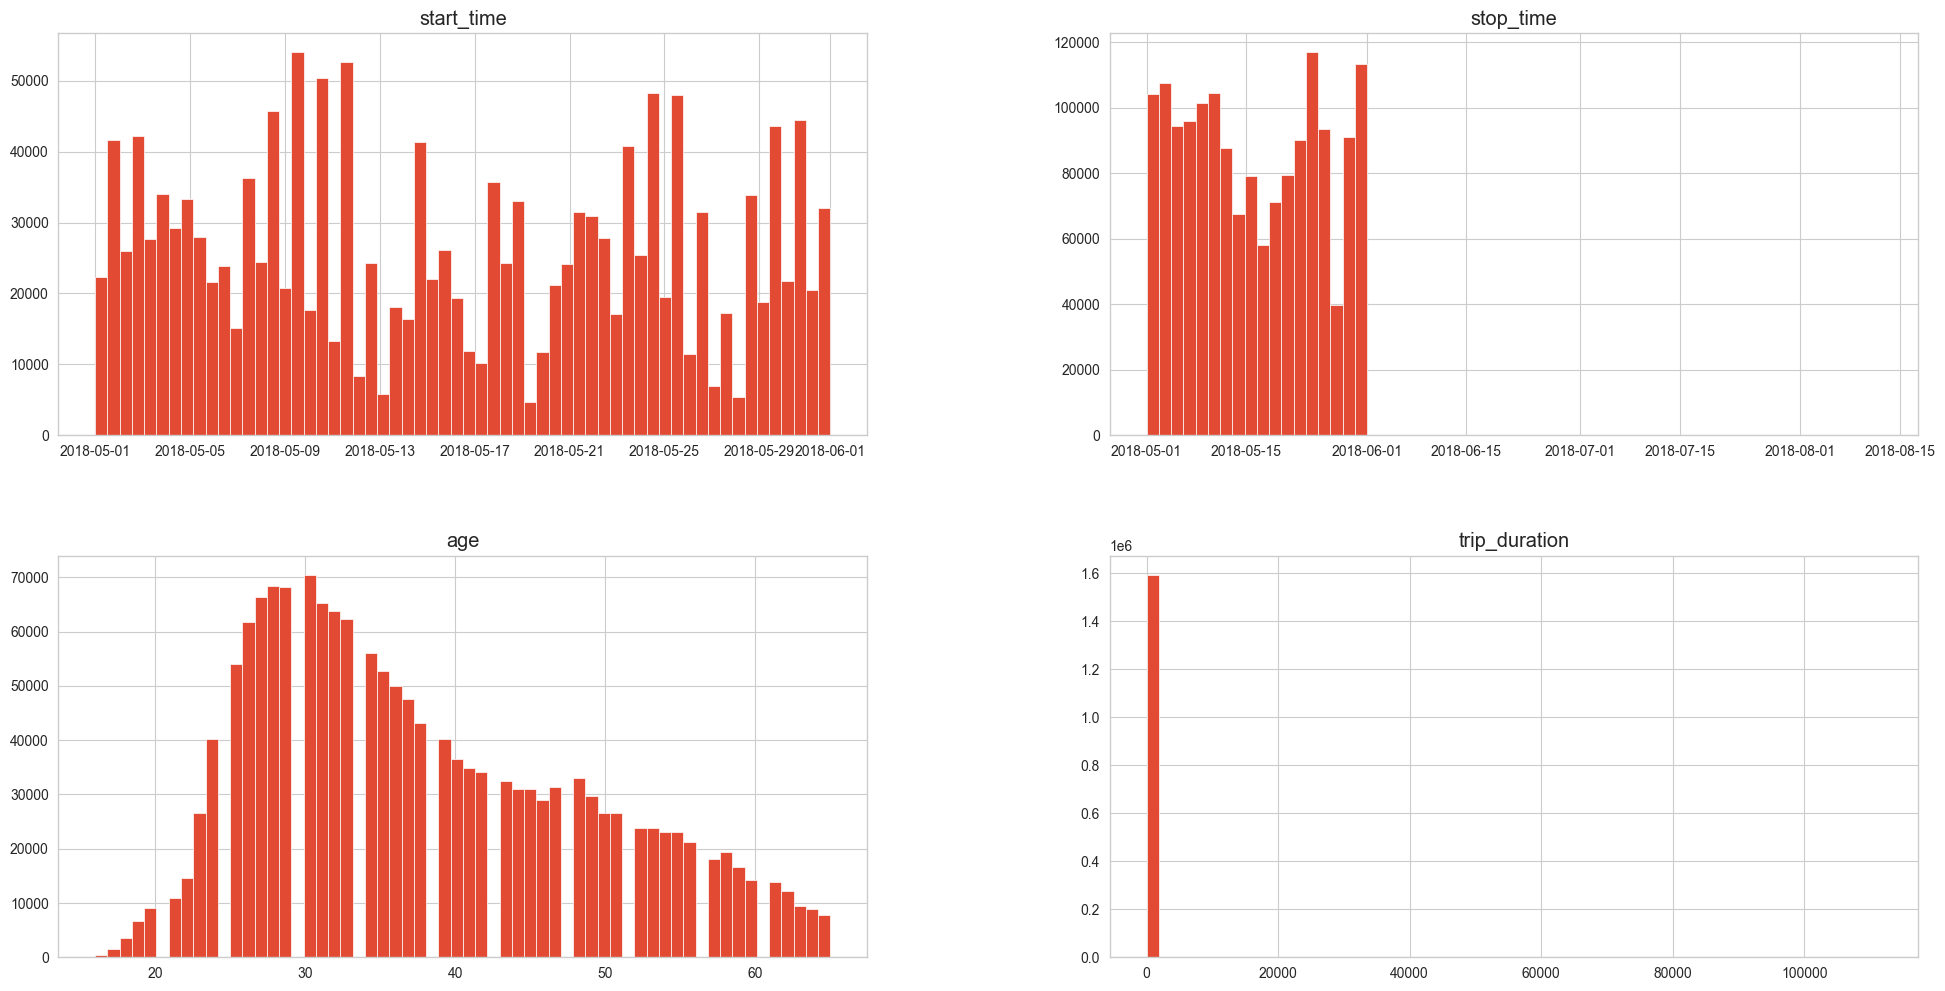

In [16]:
df_copy.hist(bins=60, figsize=(24, 12))
plt.show()

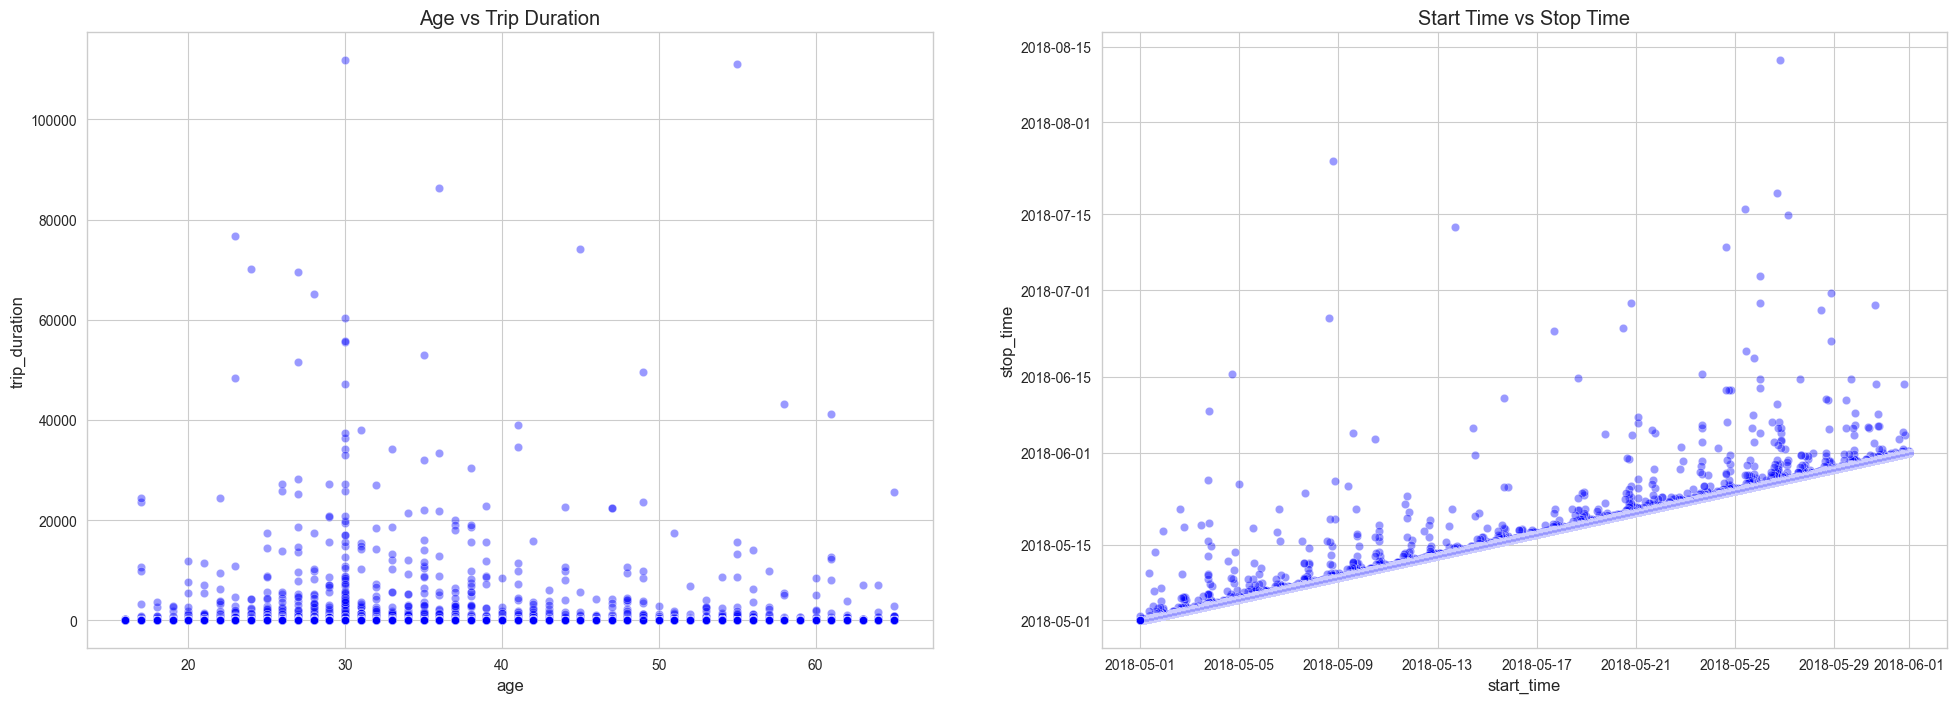

In [17]:
# create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# create scatterplot for age vs trip_duration, start_time vs stop_time
sns.scatterplot(data=df_copy, x='age', y='trip_duration', color='blue', alpha=0.4, ax=axs[0])

# create scatterplot for start_time vs stop_time
sns.scatterplot(data=df_copy, x='start_time', y='stop_time', color='blue', alpha=0.4, ax=axs[1])

# add titles for each subplot
axs[0].set_title('Age vs Trip Duration')
axs[1].set_title('Start Time vs Stop Time')

plt.show()

I noticed that there were some anomalies in the trip_duration and start_time vs stop_time variables that didn't make sense for bike sharing in New York City. I thought that maybe there were some errors in how the data was collected or logged. 

To have a better result, I decided to filter the dataset using 0.99 quantile.

In [18]:
filter_trips = df_copy.trip_duration.quantile(0.99)
df_copy = df_copy.query('trip_duration < @filter_trips')
df_copy.sort_values('trip_duration', ascending=False).head()

,start_time,stop_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,bike_id,gender,age,trip_duration
943205,2018-05-11 18:28:07,2018-05-11 19:18:28,457,Broadway & W 58 St,285,Broadway & E 14 St,Subscriber,30210,male,35,50.330002
1347696,2018-05-04 19:53:19,2018-05-04 20:43:40,479,9 Ave & W 45 St,406,Hicks St & Montague St,Subscriber,31660,female,52,50.330002
1535528,2018-05-01 21:12:54,2018-05-01 22:03:14,315,South St & Gouverneur Ln,297,E 15 St & 3 Ave,Subscriber,18483,female,38,50.330002
1224263,2018-05-07 14:13:20,2018-05-07 15:03:41,3163,Central Park West & W 68 St,3320,Central Park West & W 100 St,Customer,21362,female,32,50.330002
115045,2018-05-30 06:26:53,2018-05-30 07:17:13,3358,Garfield Pl & 8 Ave,479,9 Ave & W 45 St,Subscriber,32155,male,60,50.330002


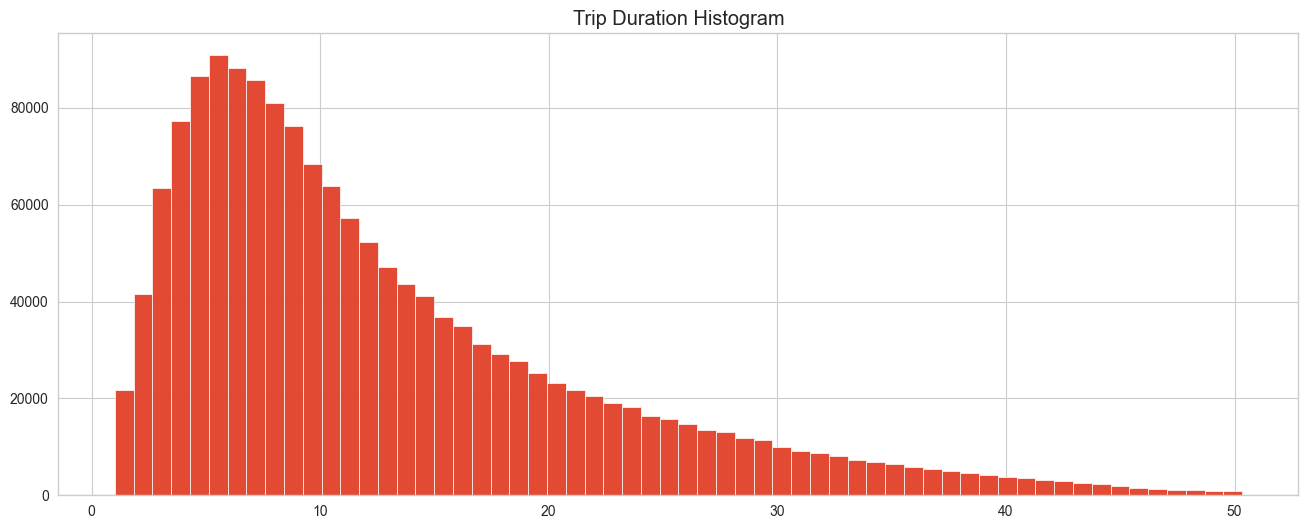

In [19]:
df_copy.trip_duration.hist(bins=60, figsize=(16, 6))
plt.title('Trip Duration Histogram')
plt.show()

#### Q: Who is the largest group of users in May 2018?

#### Answer:
For the month of May 2018, the largest group of users were males, and for the user type it was the subscribers. I also grouped everyone by age, and discovered that the age group between the ages of 30 and 45 had the highest number of users.

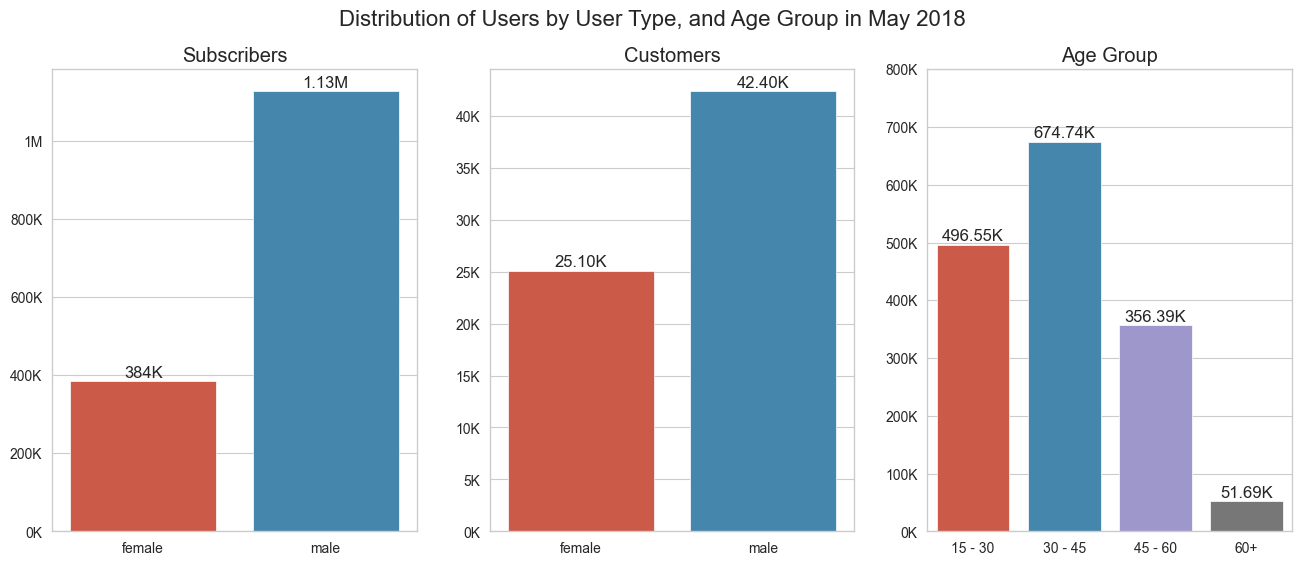

In [20]:
df_users_may = df_copy.query('start_time.dt.month == 5 & start_time.dt.year == 2018')
df_users_may.head()

,start_time,stop_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,bike_id,gender,age,trip_duration
0,2018-05-31 23:59:59,2018-06-01 00:12:57,312,Allen St & Stanton St,460,S 4 St & Wythe Ave,Subscriber,25805,male,32,12.97
1,2018-05-31 23:59:59,2018-06-01 00:12:26,401,Allen St & Rivington St,360,William St & Pine St,Subscriber,17258,male,24,12.45
2,2018-05-31 23:59:51,2018-06-01 00:08:09,483,E 12 St & 3 Ave,368,Carmine St & 6 Ave,Subscriber,19692,male,39,8.28
3,2018-05-31 23:59:48,2018-06-01 00:07:33,3107,Bedford Ave & Nassau Ave,3076,Scholes St & Manhattan Ave,Subscriber,28285,male,28,7.75
4,2018-05-31 23:59:45,2018-06-01 00:07:48,3341,Central Park West & W 102 St,3400,E 110 St & Madison Ave,Subscriber,21000,female,51,8.05


Filter out the start_time so our records will be just May 2018.

In [21]:
df_users_may.start_time.min(), df_users_may.start_time.max()

(Timestamp('2018-05-01 00:00:11'), Timestamp('2018-05-31 23:59:59'))

In [22]:
# Group by gender and user_type. Count the values of each user types and get the total.
may_users = (
    df_users_may
    .groupby(['gender', 'user_type'])
    .size()
    .reset_index(name='count')
    .pivot_table(index='gender', columns='user_type', values='count')
    .reset_index()
    .rename_axis(None, axis=1)  # Remove index name user_type
    .rename(columns=str.lower)
)

# create a new column 'users' that contains the total number of users for each gender
may_users['num_users'] = may_users['customer'] + may_users['subscriber']
may_users

,gender,customer,subscriber,num_users
0,female,25100,384395,409495
1,male,42397,1127479,1169876


In [23]:
# Make a new df for our filtered month
filter_month_may = df_users_may.copy()

# Let's also group the age [15 - 30, 30 - 45, 45 - 60, 60+] to see the largest group of users.
# Create a new column with age brackets
bins = [15, 30, 45, 60, 120]  # Age brackets
labels = ['15 - 30', '30 - 45', '45 - 60', '60+']  # Labels for the age brackets
filter_month_may['age_bracket'] = pd.cut(df_users_may['age'], bins=bins, labels=labels)

# Group by the age bracket column and sum the number of users
may_users_by_age_bracket = (
    filter_month_may
    .groupby('age_bracket')
    .size()
    .reset_index(name='num_users')
)
may_users_by_age_bracket

,age_bracket,num_users
0,15 - 30,496554
1,30 - 45,674738
2,45 - 60,356392
3,60+,51687


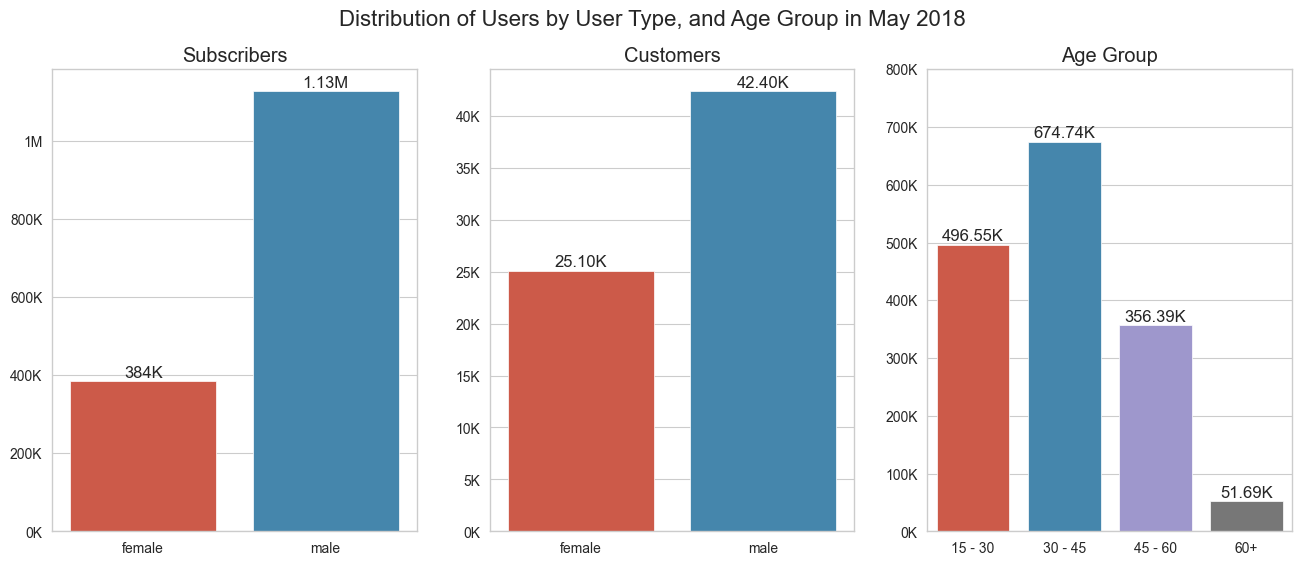

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

# Plots
sns.barplot(data=may_users, x='gender', y='subscriber', ax=axs[0])
sns.barplot(data=may_users, x='gender', y='customer', ax=axs[1])
sns.barplot(data=may_users_by_age_bracket, x='age_bracket', y='num_users', ax=axs[2])

# Subscribers Labels
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x/1_000_000)}M' if x >= 1_000_000 else f'{int(x/1_000)}K')
axs[0].yaxis.set_major_formatter(formatter)
axs[0].set(
    ylabel='',
    xlabel='',
    title='Subscribers'
)

# Customers Labels
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x/1_000)}K')
axs[1].yaxis.set_major_formatter(formatter)
axs[1].set(
    ylabel='',
    xlabel='',
    title='Customers'
)

# Age bracket Labels
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x/1_000)}K')
axs[2].yaxis.set_major_formatter(formatter)
axs[2].set(
    ylabel='',
    xlabel='',
    title='Age Group',
    yticks=(np.arange(0, may_users_by_age_bracket.num_users.max() + 150_000, 100_000))
)

# Add value labels on top of each bar
for p_subs, p_cus, p_age in zip(axs[0].containers, axs[1].containers, axs[2].containers):
    # Subscribers User Type
    labels_subs = [f'{val/1_000_000:.2f}M' if val >= 1000000 else f'{int(val/1_000)}K' for val in p_subs.datavalues]
    axs[0].bar_label(p_subs, label_type='edge', padding=1, fontsize=12, labels=labels_subs)
    
    # Customers User Type
    labels_cus = [f'{val/1_000:.2f}K' for val in p_cus.datavalues]
    axs[1].bar_label(p_cus, label_type='edge', padding=1, fontsize=12, labels=labels_cus)
    
    # Subscribers
    labels_age = [f'{val/1_000:.2f}K' for val in p_age.datavalues]
    axs[2].bar_label(p_age, label_type='edge', padding=1, fontsize=12, labels=labels_age)

plt.suptitle('Distribution of Users by User Type, and Age Group in May 2018', fontsize=16)
plt.show()

#### Q: How was the daily trend of the number of trips and number of users in May 2018?

#### Answer:
There appears to be a strong correlation between the total number of trips and the number of users in the subscriber category, as the line plots for these two variables are nearly identical. This suggests that a significant portion of bike renters are subscribers. Interestingly, the highest number of trips and users occurred on May 9, 2018, while the lowest was on May 19, 2018.

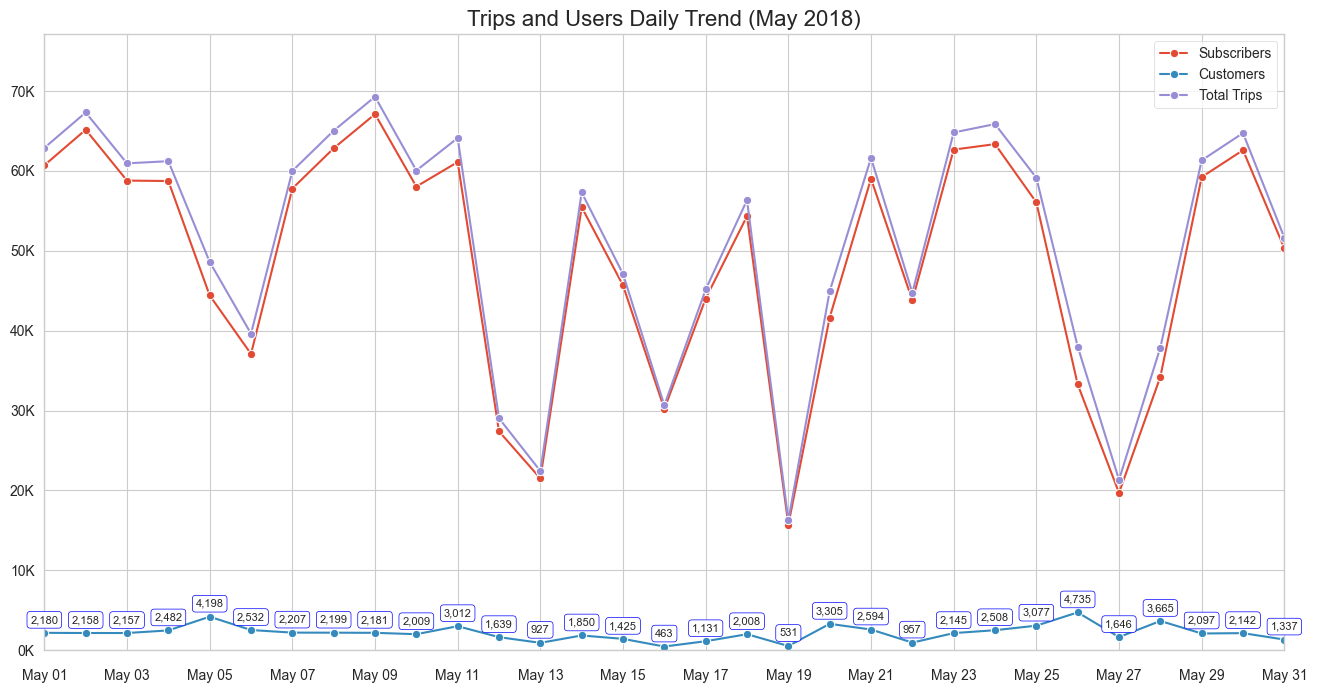

In [25]:
df_copy.head()

,start_time,stop_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,bike_id,gender,age,trip_duration
0,2018-05-31 23:59:59,2018-06-01 00:12:57,312,Allen St & Stanton St,460,S 4 St & Wythe Ave,Subscriber,25805,male,32,12.97
1,2018-05-31 23:59:59,2018-06-01 00:12:26,401,Allen St & Rivington St,360,William St & Pine St,Subscriber,17258,male,24,12.45
2,2018-05-31 23:59:51,2018-06-01 00:08:09,483,E 12 St & 3 Ave,368,Carmine St & 6 Ave,Subscriber,19692,male,39,8.28
3,2018-05-31 23:59:48,2018-06-01 00:07:33,3107,Bedford Ave & Nassau Ave,3076,Scholes St & Manhattan Ave,Subscriber,28285,male,28,7.75
4,2018-05-31 23:59:45,2018-06-01 00:07:48,3341,Central Park West & W 102 St,3400,E 110 St & Madison Ave,Subscriber,21000,female,51,8.05


I'll use the `groupby` method with the `grouper` parameter set to daily frequency to group the data by `start_time`. For each day, I'll count the number of `bike_id` to determine the number of users/trips, and sum the `trip_duration` to calculate the total trip duration. I'll then use the `pivot_table` method to create a new dataframe with columns `Customer` and `Subscriber`, where each column contains the count of `bike_id` for the corresponding user type. This allows us to see the daily usage patterns of both customer and subscriber segments of the service.

I used `bike_id` because it's linked to both bike trips and users. Counting the number of `bike_id` is the same as counting the number of trips and users.

In [26]:
# Filter May 2018
# We can also do it likes this when filtering. I prefer this than datetime because it's much concise and shorter.
filter_month_may = df_copy.query('"2018-05-01" < start_time < "2018-06-01"')

# We will groupby user_type. I'll be counting how many bike_id per day because it's related to the user and trip.
# This will be our total user/trips per day, at the same time shows us how many types of user used our bikes.
# For additional info we will also sum the trip duration for each day.
df_daily_trend = (
    filter_month_may
    .groupby([pd.Grouper(key='start_time', freq='D'), 'user_type'])
    .agg({'bike_id': 'count', 'trip_duration': 'sum'})
    .reset_index()
    .rename(columns={"start_time": "day", "bike_id": "users"})
    .pivot_table(index='day', columns='user_type', values=['users', 'trip_duration'], aggfunc='sum')
    .reset_index()
)

# Multi level is an array of tupples we will flatten it by either using map or columns.to_flat_index()
# If we will use map then we need to map on each column values to (str) then join them with "_".
# df_daily_trend.columns = ['_'.join(map(str, col)).strip('_').lower() for col in df_daily_trend.columns.values]
df_daily_trend.columns = [f'{x}_{y}'.strip('_').lower() for x, y in df_daily_trend.columns.to_flat_index()]

df_daily_trend['total_user_trips'] = df_daily_trend['users_subscriber'] + df_daily_trend['users_customer']
df_daily_trend['total_trip_duration'] = df_daily_trend['trip_duration_subscriber'] + df_daily_trend['trip_duration_customer']
df_daily_trend.sort_values('total_user_trips', ascending=False)

,day,trip_duration_customer,trip_duration_subscriber,users_customer,users_subscriber,total_user_trips,total_trip_duration
8,2018-05-09,44876.808594,833207.625000,2181,67101,69282,878084.437500
1,2018-05-02,45797.058594,838676.312500,2158,65149,67307,884473.375000
23,2018-05-24,51882.039062,815774.875000,2508,63350,65858,867656.937500
7,2018-05-08,44814.941406,805754.437500,2199,62830,65029,850569.375000
22,2018-05-23,44185.238281,826919.625000,2145,62661,64806,871104.875000
...,...,...,...,...,...,...,...
15,2018-05-16,8326.580078,342961.406250,463,30198,30661,351288.000000
11,2018-05-12,32759.949219,315094.625000,1639,27394,29033,347854.562500
12,2018-05-13,17690.589844,232220.515625,927,21508,22435,249911.109375
26,2018-05-27,32842.300781,220336.015625,1646,19693,21339,253178.312500


In [27]:
# Double checking if the date we're querying is filtered.
filter_month_may.start_time.min(), filter_month_may.start_time.max()

(Timestamp('2018-05-01 00:00:11'), Timestamp('2018-05-31 23:59:59'))

In [28]:
# Double checking if our table above is correct.
df_copy.query('start_time.dt.date == @pd.to_datetime("2018-05-01").date()').query('user_type == "Subscriber"')['user_type'].count()

60701

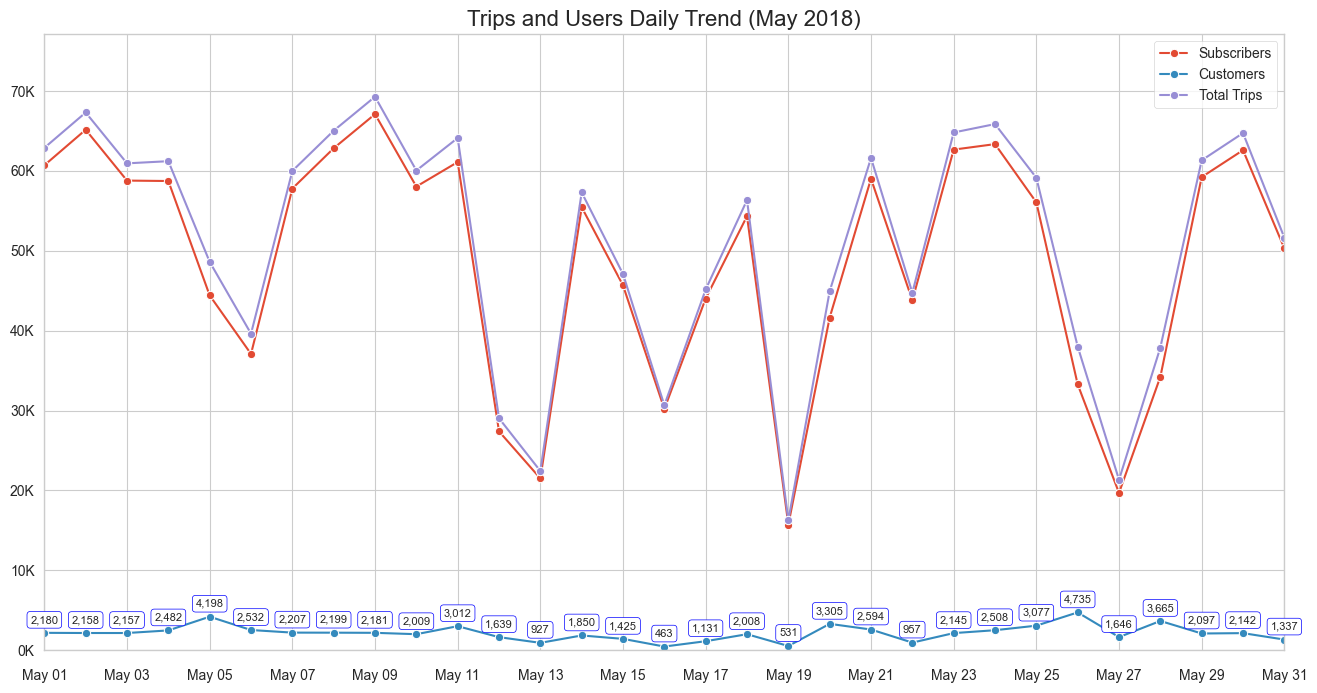

In [29]:
fig, ax = plt.subplots(figsize=(16, 8))

# User type/Trips plot
sns.lineplot(x=df_daily_trend['day'], y=df_daily_trend['users_subscriber'], label='Subscribers', ax=ax, marker='o')
sns.lineplot(x=df_daily_trend['day'], y=df_daily_trend['users_customer'], label='Customers', ax=ax, marker='o')
sns.lineplot(x=df_daily_trend['day'], y=df_daily_trend['total_user_trips'], label='Total Trips', ax=ax, marker='o')

# User Type/Trips Labels
formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x/1_000)}K')
ax.yaxis.set_major_formatter(formatter)
ax.set(
    ylabel='',
    xlabel='',
    xlim=(df_daily_trend['day'].min(), df_daily_trend['day'].max()),
    xticks=df_daily_trend.day[::2],
    xticklabels=[date.strftime('%b %d') for date in df_daily_trend['day'][::2]],
    ylim=(0, df_daily_trend['users_subscriber'].max() + 10_000)
)
ax.set_title('Trips and Users Daily Trend (May 2018)', fontsize=16)

# Add text labels to the markers for customers so it will be readable.
for x, y in zip(df_daily_trend['day'], df_daily_trend['users_customer']):
    ax.text(
        x, y+1000, f'{y:,}', 
        ha='center', va='bottom', fontsize=8, 
        bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round, pad=0.3'),
    )

# User Type/Trips Padding
ax.tick_params(axis='x', pad=10)

plt.show()

#### Q: What is the station that the users visit most in May 2018?

#### Answer:
To determine the most frequently visited station by users in May 2018, I analyzed the start and end station names and narrowed down the list to the top 10 most visited stations. 

The station most frequently visited by users was Pershing Square North, with an estimated 30,890 visits, making it the most visited station in the list of top 10 stations. In contrast, W 31 St & 7 Ave had the lowest number of visits among the top 10, with only around 17,080 recorded visits.

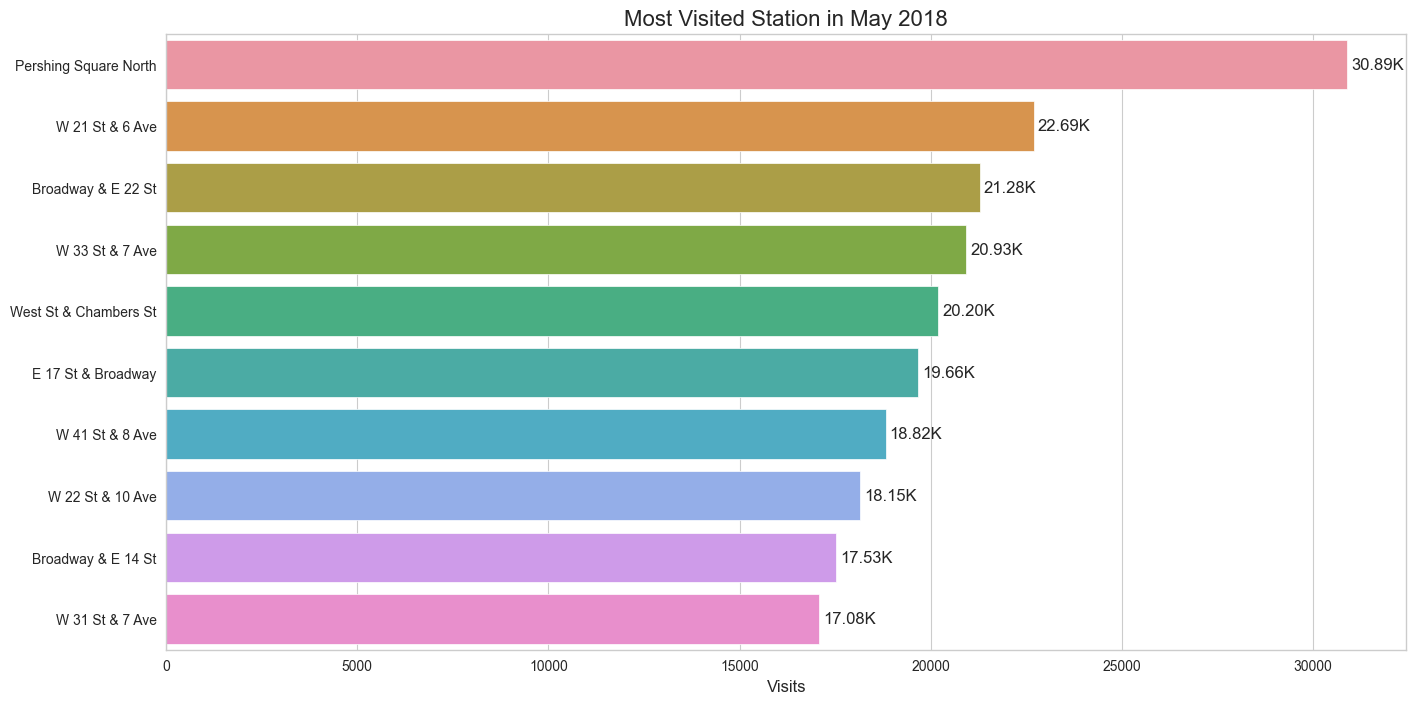

In [30]:
df_station = df_copy.query('"2018-05-01" < start_time < "2018-06-01" & "2018-05-01" < stop_time < "2018-06-01"')
df_station.start_time.min(), df_station.start_time.max(), df_station.stop_time.min(), df_station.stop_time.max()

(Timestamp('2018-05-01 00:00:11'),
 Timestamp('2018-05-31 23:57:50'),
 Timestamp('2018-05-01 00:04:35'),
 Timestamp('2018-05-31 23:59:50'))

We will also be filtering stop time, so we will only query the end stations at the range of May 1-31.

In [31]:
df_station.sample(5)

,start_time,stop_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,bike_id,gender,age,trip_duration
1094989,2018-05-09 13:40:10,2018-05-09 13:51:35,476,E 31 St & 3 Ave,3459,E 53 St & 3 Ave,Subscriber,26643,male,33,11.420000
348930,2018-05-24 19:24:13,2018-05-24 19:26:40,3447,E 71 St & 1 Ave,3156,E 72 St & York Ave,Subscriber,32958,male,38,2.430000
1416279,2018-05-03 18:23:00,2018-05-03 18:27:31,3156,E 72 St & York Ave,3151,E 81 St & York Ave,Subscriber,28582,female,24,4.500000
292613,2018-05-25 17:57:56,2018-05-25 18:03:30,262,Washington Park,324,DeKalb Ave & Hudson Ave,Subscriber,30397,male,40,5.550000
797535,2018-05-15 11:49:22,2018-05-15 12:10:46,3404,7 St & 5 Ave,217,Old Fulton St,Subscriber,24936,male,36,21.379999


In [32]:
# We will melt the df_station to var - station_name then we'll assign count 1
# Pivot the table, sum all the count and fill NaN to 0.
df_most_visited_station = (
    df_station.melt(value_vars=['start_station_name', 'end_station_name'], value_name='station_name')
    .assign(count=1)
    .pivot_table(index='station_name', columns='variable', values='count', aggfunc='sum', fill_value=0)
    .reset_index()
    .rename_axis(None, axis=1)  # Remove column index name
    .rename(columns={"start_station_name": "start_station_visits", "end_station_name": "end_station_visits"})
)

# Reorder the columns in df_most_visited_station, so it's readable.
df_most_visited_station = df_most_visited_station[['station_name', 'start_station_visits', 'end_station_visits']]

# Total of visits per station
df_most_visited_station['total_visits'] = df_most_visited_station['start_station_visits'] + df_most_visited_station['end_station_visits']

# Sort the dataframe by 'total_visits' column in descending order
df_most_visited_station = df_most_visited_station.sort_values('total_visits', ascending=False)
df_most_visited_station

,station_name,start_station_visits,end_station_visits,total_visits
574,Pershing Square North,15424,15469,30893
696,W 21 St & 6 Ave,11273,11421,22694
171,Broadway & E 22 St,10277,11001,21278
706,W 33 St & 7 Ave,10212,10718,20930
761,West St & Chambers St,9623,10574,20197
...,...,...,...,...
518,Marin Light Rail,0,1,1
398,Essex Light Rail,0,1,1
661,Van Vorst Park,0,1,1
548,NYCBS DEPOT - DELANCEY,0,1,1


Double check if we're getting the same value when we query start, end station and total visits.

In [33]:
len(df_station.query("start_station_name == 'Pershing Square North'")), len(df_station.query("end_station_name == 'Pershing Square North'")), len(df_station.query("start_station_name == 'Pershing Square North'")) + len(df_station.query("end_station_name == 'Pershing Square North'"))

(15424, 15469, 30893)

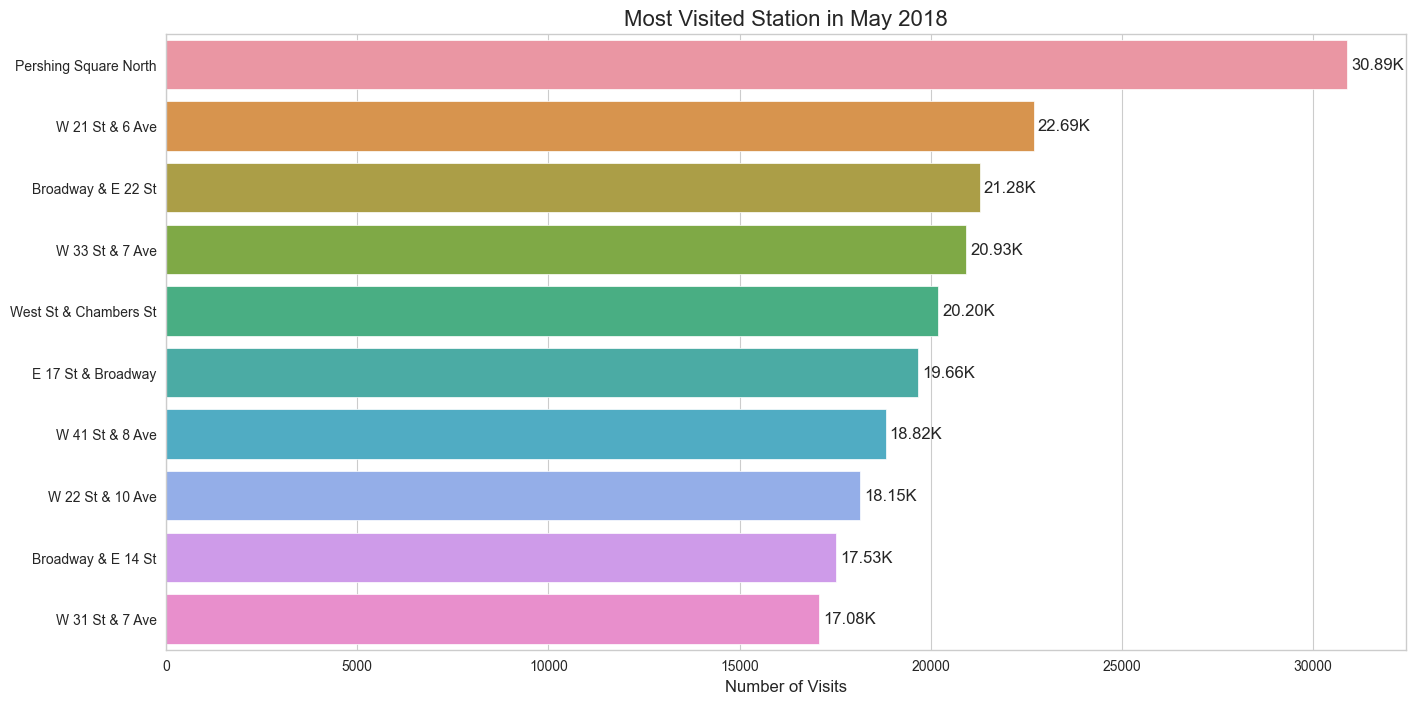

In [34]:
df_top_10 = df_most_visited_station.nlargest(10, "total_visits")

fig, ax = plt.subplots(figsize=(16, 8))

# Plots
sns.barplot(data=df_top_10, x='total_visits', y='station_name', orient='h', ax=ax)

# Settings
ax.set(
    ylabel='',
    xlabel='Number of Visits',
)
ax.set_title('Most Visited Station in May 2018', fontsize=16)

# Add value labels on top of each bar
for p in ax.containers:
    labels = [f'{val/1_000:.2f}K' for val in p.datavalues]
    ax.bar_label(p, label_type='edge', padding=3, fontsize=12, labels=labels)

# Show plot
plt.show()